In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('cubic_zirconia.csv')
df.shape

(26967, 11)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Processing

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df = df.replace({'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':0})

e = LabelEncoder()
df['color'] = e.fit_transform(df['color'])
df['clarity'] = e.fit_transform(df['clarity'])

In [7]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
df['depth_median'] = df['depth'].fillna(df.depth.median())
df.drop('depth',axis=1,inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price,depth_median
0,0.30,4,1,2,58.0,4.27,4.29,2.66,499,62.1
1,0.33,3,3,1,58.0,4.42,4.46,2.70,984,60.8
2,0.90,2,1,7,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,4,2,4,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,4,2,6,59.0,4.35,4.43,2.65,779,60.4


<AxesSubplot:title={'center':'Correlation between variables'}>

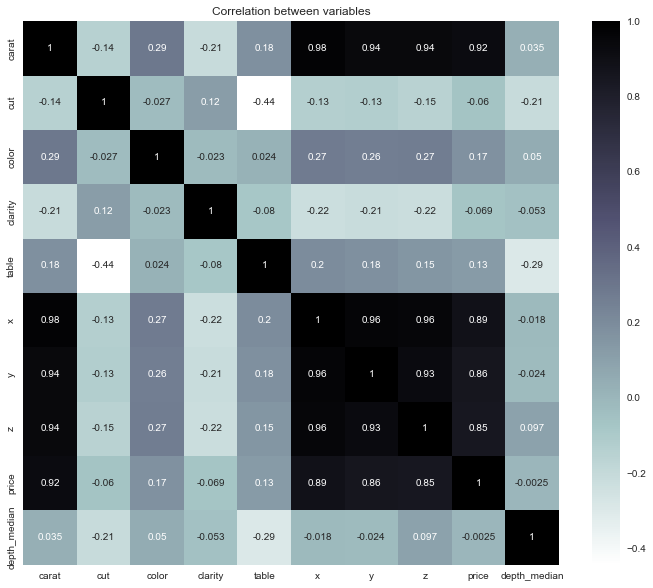

In [10]:
plt.figure(figsize = (12,10))
plt.title('Correlation between variables')
sns.heatmap(df.corr(), annot=True, cmap= "bone_r")

### Prediction

In [11]:
x = df.drop(['price'],axis=1)
y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("The shape of x_train is      ", x_train.shape)
print("The shape of x_test is       ", x_test.shape)
print("The shape of y_train is      ", y_train.shape)
print("The shape of y_test is       ", y_test.shape)

The shape of x_train is       (21573, 9)
The shape of x_test is        (5394, 9)
The shape of y_train is       (21573, 1)
The shape of y_test is        (5394, 1)


### Linear Regression

In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 902.6098739122565
Mean Squared Error: 4574149.029552109
R2 score: 0.7283199767943986


### Decision Tree

In [13]:
regressor = DecisionTreeRegressor(criterion = 'poisson')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 692.9662588060809
Mean Squared Error: 2023262.7719688544
R2 score: 0.8798289969810295


In [14]:
regressor = DecisionTreeRegressor(splitter = 'random')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 427.4496662958843
Mean Squared Error: 818068.3812106043
R2 score: 0.9514111072124757


### Normalize and repredict

<AxesSubplot:xlabel='carat'>

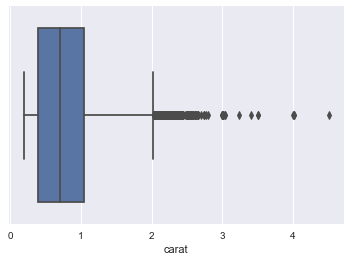

In [15]:
sns.boxplot(df.carat)

In [16]:
IQR = df.carat.quantile(0.75) - df.carat.quantile(0.25)
lower_bridge = df.carat.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.carat.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

-0.5750000000000001 2.0250000000000004


<AxesSubplot:xlabel='carat'>

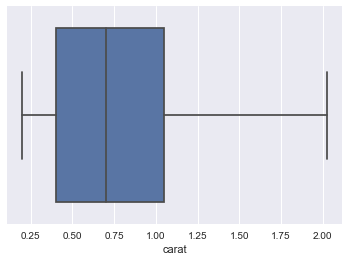

In [17]:
df.loc[df['carat'] >= 2.025, 'carat'] = 2.025
df.loc[df['carat'] <= -0.57, 'carat'] = -0.57
sns.boxplot(df.carat)

<AxesSubplot:xlabel='table'>

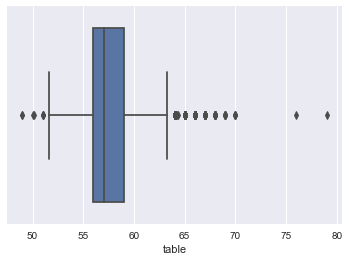

In [18]:
sns.boxplot(df.table)

In [19]:
IQR = df.table.quantile(0.75) - df.table.quantile(0.25)
lower_bridge = df.table.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.table.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

51.5 63.5


<AxesSubplot:xlabel='table'>

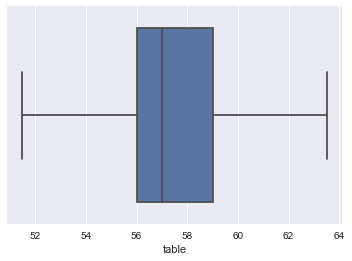

In [20]:
df.loc[df['table'] >= 63.5, 'table'] = 63.5
df.loc[df['table'] <= 51.5, 'table'] = 51.5
sns.boxplot(df.table)

<AxesSubplot:xlabel='x'>

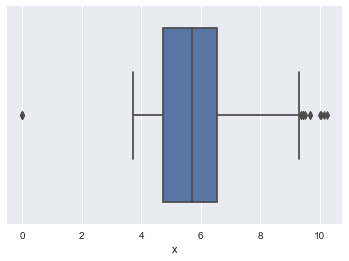

In [21]:
sns.boxplot(df.x)

In [22]:
IQR= df.x.quantile(0.75) - df.x.quantile(0.25)
lower_bridge = df.x.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.x.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

1.9500000000000002 9.309999999999999


<AxesSubplot:xlabel='x'>

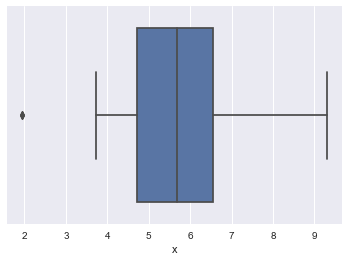

In [23]:
df.loc[df['x'] >= 9.30, 'x'] = 9.30
df.loc[df['x'] <= 1.95, 'x'] = 1.95
sns.boxplot(df.x)

<AxesSubplot:xlabel='y'>

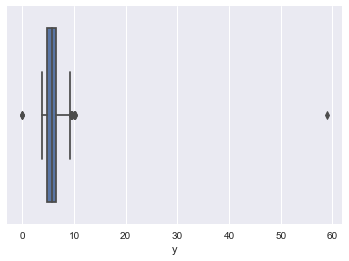

In [24]:
sns.boxplot(df.y)

In [25]:
IQR = df.y.quantile(0.75) - df.y.quantile(0.25)
lower_bridge = df.y.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.y.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

1.9649999999999999 9.285


<AxesSubplot:xlabel='y'>

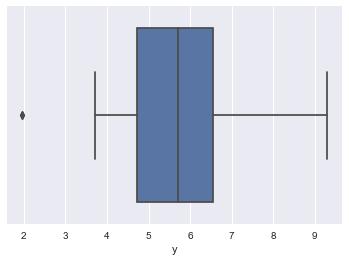

In [26]:
df.loc[df['y'] >= 9.285, 'y'] = 9.285
df.loc[df['y'] <= 1.964, 'y'] = 1.964
sns.boxplot(df.y)

<AxesSubplot:xlabel='z'>

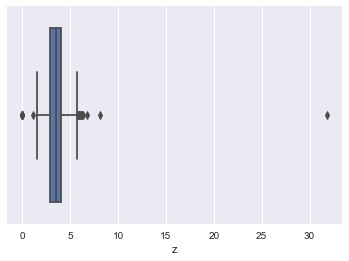

In [27]:
sns.boxplot(df.z)

In [28]:
IQR = df.z.quantile(0.75) - df.z.quantile(0.25)
lower_bridge = df.z.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.z.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

1.1899999999999997 5.75


<AxesSubplot:xlabel='z'>

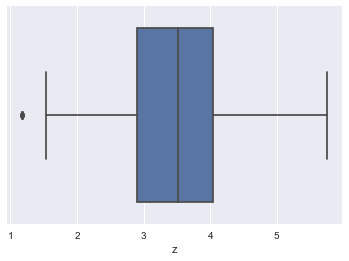

In [29]:
df.loc[df['z'] >= 5.75, 'z'] = 5.75
df.loc[df['z'] <= 1.18, 'z'] = 1.18
sns.boxplot(df.z)

<AxesSubplot:xlabel='depth_median'>

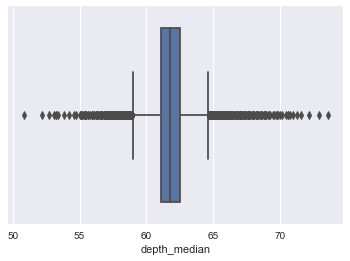

In [30]:
sns.boxplot(df.depth_median)

In [31]:
IQR= df.depth_median.quantile(0.75) - df.depth_median.quantile(0.25)
lower_bridge = df.depth_median.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.depth_median.quantile(0.75) + (IQR * 1.5)
print(lower_bridge, upper_bridge)

59.0 64.6


<AxesSubplot:xlabel='depth_median'>

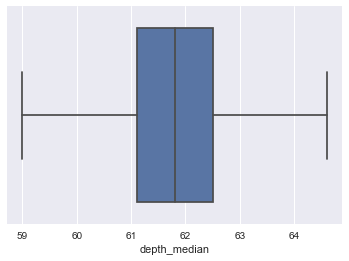

In [32]:
df.loc[df['depth_median'] >= 64.6, 'depth_median'] = 64.6
df.loc[df['depth_median'] <= 59.0, 'depth_median'] = 59.0
sns.boxplot(df.depth_median)

In [33]:
x = df.drop(['price'],axis=1)
y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("The shape of x_train is      ", x_train.shape)
print("The shape of x_test is       ", x_test.shape)
print("The shape of y_train is      ", y_train.shape)
print("The shape of y_test is       ", y_test.shape)

The shape of x_train is       (21573, 9)
The shape of x_test is        (5394, 9)
The shape of y_train is       (21573, 1)
The shape of y_test is        (5394, 1)


In [34]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 849.6666301208717
Mean Squared Error: 1676693.5564779707
R2 score: 0.9004133574595794


In [35]:
regressor = DecisionTreeRegressor(criterion = 'poisson')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 687.2715053763441
Mean Squared Error: 2007555.9483222098
R2 score: 0.8807618984202343


In [36]:
regressor = DecisionTreeRegressor(splitter = 'random')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 387.4771041898406
Mean Squared Error: 644265.1849740453
R2 score: 0.9617340888384984


### Hyperparameter tuning

A hyperparameter is a parameter whose value is set before the learning process begins.
Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.
We use Grid Search to search through many combinations of parameters to find the best ones. The search is done using a 10 fold cross validation

In [46]:
grid_search = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'splitter': ['best', 'random'],
               'max_depth': [None],
               'max_features': ['auto', 'sqrt']}

clf = DecisionTreeRegressor()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 10, verbose = 5, n_jobs = -1)
model.fit(x_train, y_train)

y_pred = model.best_estimator_.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mean Absolute Error: 388.3054319614386
Mean Squared Error: 606858.2895346682
R2 score: 0.9639558586486557
